<img src="https://drive.google.com/uc?export=view&id=18haIU555jAGlGll4hmC4OceCNMDNJI5Q" width="300"> <br>

# Notebook for the Final Project by **Konstantinos Panagi (1042837)**

This notebook presents the analysis workflow for a dataset of works from the American literary canon. The analysis was conducted and documented by **Konstantinos Panagi (1042837)** as the final assessment for the **Data Analytics** course of the **MSc in Digital Humanities** programme for the **2025-2026 academic year**.

The programme is jointly offered by the **National and Kapodistrian University of Athens**, the **University of Cyprus**, and the **ATHENA Research Centre**.

# Step 1: Libraries Loading

All necessary **Python libraries** are loaded to support numerical and textual data analysis. Specifically:
* `pandas` and `numpy` are used for **data handling**,
* `matplotlib` and `seaborn` for **visualisation**,
* `scikit-learn` for **regression models**, and
* `nltk` and `wordcloud` for **Natural Language Processing (NLP)** tasks.

In [1]:
# Install the required libraries
# Data handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
!pip -q install squarify
import squarify

# Models
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Utilities
import re
from collections import Counter

# Install external NLP libraries
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud

# NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')


# NLP tools
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# WordCloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Step 2: Data Loading

The **dataset** is loaded into a `pandas DataFrame`, enabling structured access to *entries* (rows) and *variables* (columns).

***
## Dataset Description
The **American Literature Dataset** consists of 50 representative and seminal works of American literature, spanning from the mid-19th century to the early 21st century.

Each **entry** in the dataset represents a single literary work and is described by *eight variables* that collectively capture complementary dimensions of literary information. Specifically, the dataset comprises:
* `Categorical Variables`: *title*, *author*, *category*, and *literary_period*
* `Numerical Data`: *year*, *pages*, and *average_rating*
* `Textual Data`: *descriptions*

## Data Dictionary
The dataset consists of the following *eight variables*:

`title`: The full title of the literary work.

`author`: The full name of the author.

`year`: The year of original publication or release of the work.

`pages`: The length of the work in number of pages.

`category`: The specific literary genre or form of the work (e.g., Science Fiction, Southern Gothic, Play, Satire).

`literary_period`: The broader literary movement or historical period the work belongs to (e.g., Modernism, Realism, Postmodernism).

`average_rating`: The average reader rating of the work (on a scale from 1.0 to 5.0).

`description`: An extensive textual description regarding the plot and thematic analysis of the work.

In [2]:
# Load the Data
american_lit_data = [
    {
        "title": "The Great Gatsby",
        "author": "F. Scott Fitzgerald",
        "year": 1925,
        "pages": 180,
        "category": "Novel",
        "literary_period": "Modernism",
        "average_rating": 3.93,
        "description": "The novel chronicles an era that Fitzgerald himself dubbed the 'Jazz Age'. Following the shock and chaos of World War I, American society enjoyed unprecedented levels of prosperity during the 'roaring' 1920s as the economy soared. The story takes place in 1922, centering on the mysterious millionaire Jay Gatsby and his obsession to reunite with his former lover, Daisy Buchanan.\n\nConsidered to be Fitzgerald's magnum opus, The Great Gatsby explores themes of decadence, idealism, resistance to change, social upheaval, and excess, creating a portrait of the Roaring Twenties that has been described as a cautionary tale regarding the American Dream. It vividly captures the emptiness of the upper class."
    },
    {
        "title": "To Kill a Mockingbird",
        "author": "Harper Lee",
        "year": 1960,
        "pages": 281,
        "category": "Southern Gothic",
        "literary_period": "Modernism",
        "average_rating": 4.27,
        "description": "The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. To Kill a Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.\n\nCompassionate, dramatic, and deeply moving, To Kill a Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal."
    },
    {
        "title": "The Catcher in the Rye",
        "author": "J.D. Salinger",
        "year": 1951,
        "pages": 277,
        "category": "Realistic Fiction",
        "literary_period": "Post-War",
        "average_rating": 3.80,
        "description": "The hero-narrator of The Catcher in the Rye is an ancient child of sixteen, a native New Yorker named Holden Caulfield. Through circumstances that tend to preclude adult, secondhand description, he leaves his prep school in Pennsylvania and goes underground in New York City for three days.\n\nThe boy himself is at once too simple and too complex for us to make any final comment about him or his story. Perhaps the safest thing we can say about Holden is that he was born in the world not just strongly attracted to beauty but, almost, hopelessly impaled on it. The novel is widely read for its themes of teenage angst and alienation."
    },
    {
        "title": "Moby-Dick",
        "author": "Herman Melville",
        "year": 1851,
        "pages": 635,
        "category": "Adventure",
        "literary_period": "American Renaissance",
        "average_rating": 3.54,
        "description": "So ignoring the instruction to write two paragraphs, Moby-Dick is the story of Captain Ahab's quest to avenge the whale that 'reaped' his leg. The quest is an obsession and the novel is a texture of history, myth, and science of the whale. It is a story of obsession and the limits of human knowledge.\n\nThe book is the sailor Ishmael's narrative of the obsessive quest of Ahab, captain of the whaling ship Pequod, for revenge on Moby Dick, the giant white sperm whale that on the ship's previous voyage bit off Ahab's leg at the knee. A contribution to the literature of the American Renaissance, Moby-Dick was published to mixed reviews, was a commercial failure, and was out of print at the time of the author's death in 1891."
    },
    {
        "title": "Beloved",
        "author": "Toni Morrison",
        "year": 1987,
        "pages": 324,
        "category": "Historical Fiction",
        "literary_period": "Contemporary",
        "average_rating": 3.96,
        "description": "Staring unflinchingly into the abyss of slavery, this spellbinding novel transforms history into a story as powerful as Exodus and as intimate as a lullaby. Sethe, its protagonist, was born a slave and escaped to Ohio, but eighteen years later she is still not free.\n\nShe has too many memories of Sweet Home, the beautiful farm where so many hideous things happened. And Sethe’s new home is haunted by the ghost of her baby, who died nameless and whose tombstone is engraved with a single word: Beloved. The novel examines the destructive legacy of slavery as it chronicles the life of a black woman named Sethe."
    },
    {
        "title": "The Grapes of Wrath",
        "author": "John Steinbeck",
        "year": 1939,
        "pages": 464,
        "category": "Historical Fiction",
        "literary_period": "Modernism",
        "average_rating": 4.02,
        "description": "The Grapes of Wrath creates an indelible portrait of the conflict between the powerful and the powerless, the reaction of man to the hostile reaction of the nature and to one another. It follows the Joads, a poor family of tenant farmers driven from their Oklahoma home by drought, economic hardship, and changes in the agricultural industry.\n\nDue to their nearly hopeless situation, and in part because they were trapped in the Dust Bowl, the Joads set out for California. Along with thousands of other 'Okies', they seek jobs, land, dignity, and a future. The novel is a staple of American high schools and colleges and won the Pulitzer Prize."
    },
    {
        "title": "Invisible Man",
        "author": "Ralph Ellison",
        "year": 1952,
        "pages": 581,
        "category": "Bildungsroman",
        "literary_period": "Post-War",
        "average_rating": 3.89,
        "description": "First published in 1952 and immediately hailed as a masterpiece, Invisible Man is one of those rare novels that have changed the shape of American literature. For not only does Ralph Ellison's nightmare journey across the racial divide tell unparalleled truths about the nature of bigotry and its effects on the minds of both victims and perpetrators, it gives us an entirely new model of what a novel can be.\n\nThe book addresses many of the social and intellectual issues facing African-Americans early in the twentieth century, including black nationalism, the relationship between black identity and Marxism, and the reformist racial policies of Booker T. Washington, as well as issues of individuality and personal identity."
    },
    {
        "title": "The Scarlet Letter",
        "author": "Nathaniel Hawthorne",
        "year": 1850,
        "pages": 279,
        "category": "Historical Romance",
        "literary_period": "Romanticism",
        "average_rating": 3.45,
        "description": "Set in Puritan Massachusetts Bay Colony during the years 1642 to 1649, the novel tells the story of Hester Prynne, who conceives a daughter through an affair and then struggles to create a new life of repentance and dignity. Containing a number of religious and historic allusions, the book explores themes of legalism, sin, and guilt.\n\nThe Scarlet Letter examines the rigidity of the Puritan society and the psychological effects of public shaming. Hester Prynne's strength and silence in the face of public humiliation make her one of the most complex female figures in American literature. The red letter 'A' she is forced to wear is a symbol that evolves throughout the narrative."
    },
    {
        "title": "Fahrenheit 451",
        "author": "Ray Bradbury",
        "year": 1953,
        "pages": 158,
        "category": "Science Fiction",
        "literary_period": "Post-War",
        "average_rating": 3.97,
        "description": "Guy Montag is a fireman. His job is to destroy the most illegal of commodities, the printed book, along with the houses in which they are hidden. Montag never questions the destruction and ruin his actions produce, returning each day to his bland life and wife, Mildred, who spends all day with her television 'family'.\n\nBut when he meets an eccentric young neighbor, Clarisse, who introduces him to a past where people didn't live in fear and to a present where one sees the world through the ideas in books, Montag begins to question everything he has known. The novel presents a future American society where books are outlawed and 'firemen' burn any that are found."
    },
    {
        "title": "The Sound and the Fury",
        "author": "William Faulkner",
        "year": 1929,
        "pages": 326,
        "category": "Southern Gothic",
        "literary_period": "Modernism",
        "average_rating": 3.85,
        "description": "The Sound and the Fury is the tragedy of the Compson family, featuring some of the most memorable characters in literature: beautiful, rebellious Caddy; the manchild Benjy; haunted, neurotic Quentin; and Jason, the brutal cynic. The novel employs multiple narrative styles, including stream of consciousness.\n\nPublished in 1929, it details the destruction and downfall of the aristocratic Compsons from Mississippi. The novel is divided into four sections, each told by a different character, offering fragmented perspectives on the same events. It is considered one of the masterpieces of American modernism."
    },
    {
        "title": "On the Road",
        "author": "Jack Kerouac",
        "year": 1957,
        "pages": 307,
        "category": "Beat Generation",
        "literary_period": "Post-War",
        "average_rating": 3.61,
        "description": "On the Road chronicles Jack Kerouac's years traveling the North American continent with his friend Neal Cassady, 'a sideburned hero of the snowy West.' As 'Sal Paradise' and 'Dean Moriarty,' the two roam the country in a quest for self-knowledge and experience.\n\nThe novel is a quintessential American vision of freedom and hope, representing the Beat Generation. It explores the themes of jazz, poetry, and drug use, capturing the spirit of a generation that rejected the conformity of the 1950s. The book was chosen by Time magazine as one of the 100 best English-language novels from 1923 to 2005."
    },
    {
        "title": "The Old Man and the Sea",
        "author": "Ernest Hemingway",
        "year": 1952,
        "pages": 127,
        "category": "Literary Fiction",
        "literary_period": "Modernism",
        "average_rating": 3.80,
        "description": "This short novel tells the story of an old Cuban fisherman named Santiago, who has gone 84 days without catching a fish. On the 85th day, he sets out alone into the Gulf Stream, where he hooks a giant marlin. What follows is an epic battle of endurance between man and nature.\n\nThe Old Man and the Sea was awarded the Pulitzer Prize for Fiction in 1953 and was cited by the Nobel Committee as contributing to their awarding of the Nobel Prize in Literature to Hemingway in 1954. The story is renowned for its simple, direct language and its profound exploration of courage, loss, and personal triumph."
    },
    {
        "title": "Slaughterhouse-Five",
        "author": "Kurt Vonnegut",
        "year": 1969,
        "pages": 275,
        "category": "Science Fiction",
        "literary_period": "Postmodernism",
        "average_rating": 4.10,
        "description": "Slaughterhouse-Five is an anti-war novel centering on the infamous firebombing of Dresden. Billy Pilgrim, an optometrist and a chaplain's assistant, survives the bombing as a prisoner of war. However, Billy is also a time traveler who experiences the events of his life in a non-linear fashion.\n\nThe novel blends science fiction elements with a realistic depiction of the horrors of war. Through Billy's abduction by aliens known as Tralfamadorians, Vonnegut explores themes of fatalism and the nature of time. The phrase 'So it goes' appears repeatedly throughout the text, emphasizing the inevitability of death."
    },
    {
        "title": "Adventures of Huckleberry Finn",
        "author": "Mark Twain",
        "year": 1884,
        "pages": 366,
        "category": "Picaresque",
        "literary_period": "Realism",
        "average_rating": 3.83,
        "description": "A nineteenth-century boy from a Mississippi River town recounts his adventures as he travels down the river with a runaway slave, encountering a family engaged in a feud, two scoundrels pretending to be royalty, and Tom Sawyer's aunt who mistakes him for Tom. It is noted for its colorful description of people and places along the Mississippi River.\n\nOften called 'The Great American Novel', it is famous for its use of vernacular English and its scathing satire on entrenched attitudes, particularly racism. The friendship between Huck and Jim, the runaway slave, is central to the novel, challenging the social norms of the antebellum South."
    },
    {
        "title": "Their Eyes Were Watching God",
        "author": "Zora Neale Hurston",
        "year": 1937,
        "pages": 219,
        "category": "Southern Gothic",
        "literary_period": "Harlem Renaissance",
        "average_rating": 3.96,
        "description": "Fair and long-legged, independent and articulate, Janie Crawford sets out to be her own person -- no mean feat for a black woman in the '30s. Janie's quest for identity takes her through three marriages and into a journey back to her roots. The novel is a seminal work in African-American literature.\n\nInitially rejected by male critics of the time, the novel was rediscovered in the 1970s. It explores gender roles and the power of speech, utilizing a unique narrative structure that frames the story as Janie telling her life story to her best friend. It celebrates the voice of a black woman searching for her own autonomy."
    },
    {
        "title": "Catch-22",
        "author": "Joseph Heller",
        "year": 1961,
        "pages": 453,
        "category": "Satire",
        "literary_period": "Postmodernism",
        "average_rating": 3.99,
        "description": "Set in Italy during World War II, this is the story of the incomparable, malingering bombardier, Yossarian, a hero who is furious because thousands of people he has never met are trying to kill him. But his real problem is not the enemy—it is his own army, which keeps increasing the number of missions the men must fly to complete their service.\n\nThe novel is famous for the term 'Catch-22', a bureaucratic paradox. If Yossarian flies his missions, he is crazy and doesn't have to; but if he doesn't want to fly them, he is sane and has to. The book uses dark humor and disjointed chronology to expose the absurdity of war and military life."
    },
    {
        "title": "The Bell Jar",
        "author": "Sylvia Plath",
        "year": 1963,
        "pages": 244,
        "category": "Roman à clef",
        "literary_period": "Contemporary",
        "average_rating": 4.04,
        "description": "The Bell Jar chronicles the crack-up of Esther Greenwood: brilliant, beautiful, enormously talented, and successful, but slowly going under—maybe for the last time. Sylvia Plath masterfully draws the reader into Esther's breakdown with such intensity that Esther's insanity becomes completely real and even rational.\n\nThe novel serves as a semi-autobiographical account of Plath's own struggle with depression. It provides a scathing critique of the medical profession and the expectations placed on women in 1950s America. The 'bell jar' metaphor describes the feeling of being trapped in one's own head, breathing the same sour air."
    },
    {
        "title": "The Road",
        "author": "Cormac McCarthy",
        "year": 2006,
        "pages": 287,
        "category": "Post-Apocalyptic",
        "literary_period": "Contemporary",
        "average_rating": 3.99,
        "description": "A father and his son walk alone through burned America. Nothing moves in the ravaged landscape save the ash on the wind. It is cold enough to crack stones, and when the snow falls it is gray. The sky is dark. Their destination is the coast, although they don't know what, if anything, awaits them there.\n\nThe Road is a profound meditation on the best and worst of what we are capable of: ultimate destructiveness, desperate tenacity, and the tenderness that keeps two people alive in the face of total devastation. It is written in a stripped-down style that mirrors the bleak landscape of the story."
    },
    {
        "title": "Little Women",
        "author": "Louisa May Alcott",
        "year": 1868,
        "pages": 449,
        "category": "Coming-of-Age",
        "literary_period": "Realism",
        "average_rating": 4.14,
        "description": "Generations of readers young and old, male and female, have fallen in love with the March sisters of Louisa May Alcott's most popular and enduring novel. Little Women explores the lives of the four March sisters—Meg, Jo, Beth, and Amy—and details their passage from childhood to womanhood.\n\nLoosely based on the author's own life and her relationship with her three sisters, the novel addresses three major themes: domesticity, work, and true love. Each sister has a distinct personality and destiny, making the book a timeless study of family dynamics and the choices women make in their lives."
    },
    {
        "title": "The Call of the Wild",
        "author": "Jack London",
        "year": 1903,
        "pages": 172,
        "category": "Adventure",
        "literary_period": "Naturalism",
        "average_rating": 3.89,
        "description": "Buck, a powerful dog, is stolen from his comfortable home in California and sold into service as a sled dog in the Yukon during the Klondike Gold Rush. He is forced to fight to dominate other dogs in a harsh climate. Eventually, he sheds the veneer of civilization and relies on primordial instinct to survive.\n\nThe Call of the Wild is a masterpiece of early 20th-century American literature. It explores the concept of the 'survival of the fittest' and the thin line between civilization and savagery. Jack London used his own experiences in the Klondike to craft this gripping tale of a dog's return to his wild roots."
    },
    {
        "title": "The Sun Also Rises",
        "author": "Ernest Hemingway",
        "year": 1926,
        "pages": 251,
        "category": "Modernist Novel",
        "literary_period": "Modernism",
        "average_rating": 3.86,
        "description": "The quintessential novel of the Lost Generation, The Sun Also Rises is one of Ernest Hemingway's masterpieces. It follows Jake Barnes and Lady Brett Ashley alongside a group of American and British expatriates as they travel from Paris to the Festival of San Fermín in Pamplona to watch the running of the bulls.\n\nThe novel explores themes of love, death, renewal, and masculinity. The characters are disillusioned by World War I, wandering aimlessly and seeking solace in alcohol and travel. Hemingway's spare writing style effectively conveys the emotional numbness and moral ambiguity of the post-war generation."
    },
    {
        "title": "Song of Solomon",
        "author": "Toni Morrison",
        "year": 1977,
        "pages": 337,
        "category": "Magical Realism",
        "literary_period": "Contemporary",
        "average_rating": 4.20,
        "description": "Milkman Dead was born shortly after a neighborhood eccentric hurled himself off a rooftop in a vain attempt at flight. For the rest of his life he, too, will be trying to fly. With this brilliantly imagined novel, Toni Morrison transfigures the coming-of-age story as only she can.\n\nThis novel follows Milkman as he journeys from the rustbelt city of his birth to the place of his family's origins. Morrison introduces an entire cast of strivers and seeresses, liars and assassins, the inhabitants of a fully realized black world. The book explores African-American identity and the complex history of slavery."
    },
    {
        "title": "White Noise",
        "author": "Don DeLillo",
        "year": 1985,
        "pages": 320,
        "category": "Satire",
        "literary_period": "Postmodernism",
        "average_rating": 3.87,
        "description": "White Noise tells the story of Jack Gladney, a teacher of Hitler studies at a liberal arts college in Middle America. Jack and his fourth wife, Babette, bound by their love, fear of death, and four ultramodern offspring, navigate the rocky passages of family life to the background babble of brand-name consumerism.\n\nThen a lethal black chemical cloud, unleashed by an industrial accident, floats over their lives, an 'airborne toxic event' that is a more urgent and visible version of the white noise engulfing the Gladneys—the radio transmissions, sirens, microwaves, and TV murmurings that constitute the soundtrack of American life."
    },
    {
        "title": "Infinite Jest",
        "author": "David Foster Wallace",
        "year": 1996,
        "pages": 1079,
        "category": "Encyclopedic Novel",
        "literary_period": "Postmodernism",
        "average_rating": 4.25,
        "description": "A gargantuan, mind-altering comedy about the Pursuit of Happiness in America. Set in an addicts' halfway house and a tennis academy, and featuring the most endearingly screwed-up family to come along in recent fiction, Infinite Jest explores essential questions about what entertainment is and why it has come to so dominate our lives.\n\nThe novel is known for its complex structure, extensive endnotes, and prophetic vision of a future dominated by corporate sponsorship and video technology. It delves deep into addiction, recovery, and the loneliness of the human condition in a hyper-mediated society."
    },
    {
        "title": "Blood Meridian",
        "author": "Cormac McCarthy",
        "year": 1985,
        "pages": 337,
        "category": "Western",
        "literary_period": "Postmodernism",
        "average_rating": 4.16,
        "description": "Blood Meridian is an epic novel of the violence and depravity that attended America's westward expansion, brilliantly subverting the conventions of the Western novel and the mythology of the Wild West. Based on historical events that took place on the Texas-Mexico border in the 1850s, it traces the fortunes of the Kid, a fourteen-year-old Tennesseean.\n\nThe Kid stumbles into the nightmarish world where Indians are being murdered and the market for their scalps is thriving. The central character is Judge Holden, a bald, albino man of great intellect and monstrous violence. The novel explores the nature of evil and the inherent violence of existence."
    },
    {
        "title": "A Streetcar Named Desire",
        "author": "Tennessee Williams",
        "year": 1947,
        "pages": 107,
        "category": "Play",
        "literary_period": "Modernism",
        "average_rating": 3.99,
        "description": "The play reveals to the very depths the character of Blanche DuBois, a woman whose life has been undermined by her romantic illusions, which lead her to reject the realities of life with which she is faced and which she consistently ignores. Blanche arrives at the apartment of her sister Stella in New Orleans.\n\nThere she meets Stella's husband, Stanley Kowalski, a rising member of the industrial, urban working class. The conflict between Blanche's fading Southern gentility and Stanley's brute force results in a tragic conclusion. The play is a powerful study of sexual frustration, violence, and madness."
    },
    {
        "title": "Uncle Tom's Cabin",
        "author": "Harriet Beecher Stowe",
        "year": 1852,
        "pages": 438,
        "category": "Political Fiction",
        "literary_period": "Romanticism",
        "average_rating": 3.85,
        "description": "Uncle Tom's Cabin is the most popular novel of the 19th century and a passionate indictment of slavery. Published in 1852, the novel had a profound effect on attitudes toward African Americans and slavery in the U.S. and is said to have helped lay the groundwork for the Civil War.\n\nThe story follows Uncle Tom, a suffering black slave, and the stories of other characters around him. Stowe focuses on the families broken apart by slavery and the Christian love that can overcome it. Despite modern criticism regarding racial stereotypes, it remains a landmark text in American history."
    },
    {
        "title": "The Age of Innocence",
        "author": "Edith Wharton",
        "year": 1920,
        "pages": 293,
        "category": "Romance",
        "literary_period": "Realism",
        "average_rating": 3.97,
        "description": "Newland Archer, a lawyer and heir to one of New York City's most illustrious families, is happily anticipating a highly desirable marriage to the sheltered and beautiful May Welland. Yet he finds reason to doubt his choice of bride after the appearance of Countess Ellen Olenska, May's exotic and beautiful cousin.\n\nThe novel is set in the Gilded Age of New York City high society. Wharton paints a picture of a society bound by rigid rules and social codes, where the appearance of propriety is more important than reality. It won the 1921 Pulitzer Prize for Fiction, making Wharton the first woman to win the award."
    },
    {
        "title": "The Awakening",
        "author": "Kate Chopin",
        "year": 1899,
        "pages": 195,
        "category": "Feminist Literature",
        "literary_period": "Realism",
        "average_rating": 3.70,
        "description": "When first published in 1899, The Awakening shocked readers with its honest treatment of female marital infidelity. Audiences accustomed to the pieties of late Victorian romantic fiction were taken aback by Chopin's daring portrayal of a woman trapped in a stifling marriage who seeks and finds passionate physical love outside the confines of her domestic situation.\n\nThe protagonist, Edna Pontellier, struggles to reconcile her increasingly unorthodox views on femininity and motherhood with the prevailing social attitudes of the turn-of-the-century South. It is now widely seen as a landmark work of early feminism, exploring the consequences of a woman's desire for independence."
    },
    {
        "title": "Native Son",
        "author": "Richard Wright",
        "year": 1940,
        "pages": 504,
        "category": "Social Protest Novel",
        "literary_period": "Realism",
        "average_rating": 4.02,
        "description": "Right from the start, Bigger Thomas had been headed for jail. It could have been for assault or petty larceny; by chance, it was for murder and rape. Native Son tells the story of this young black man caught in a downward spiral after he kills a young white woman in a brief moment of panic.\n\nSet in Chicago in the 1930s, Wright's powerful novel is an unsparing reflection on the poverty and feelings of hopelessness experienced by people in inner cities across the country and of what it means to be black in America. The book challenges the reader to look at the systemic causes of crime and racism."
    },
    {
        "title": "East of Eden",
        "author": "John Steinbeck",
        "year": 1952,
        "pages": 601,
        "category": "Epic Novel",
        "literary_period": "Modernism",
        "average_rating": 4.38,
        "description": "Set in the rich farmland of California's Salinas Valley, this sprawling and often brutal novel follows the intertwined destinies of two families—the Trasks and the Hamiltons—whose generations helplessly reenact the fall of Adam and Eve and the poisonous rivalry of Cain and Abel.\n\nThe work was considered by Steinbeck himself to be his magnum opus. It explores themes of depravity, beneficence, love, and the struggle for acceptance, personal greatness, and the capacity for self-destruction. It is a symbolic recreation of the biblical story of Genesis in a 20th-century setting."
    },
    {
        "title": "Of Mice and Men",
        "author": "John Steinbeck",
        "year": 1937,
        "pages": 107,
        "category": "Novella",
        "literary_period": "Modernism",
        "average_rating": 3.87,
        "description": "The story follows two displaced migrant ranch workers, who move from place to place in California in search of new job opportunities during the Great Depression in the United States. George Milton is an intelligent but uneducated man, and Lennie Small is a man of large stature and great strength but limited mental abilities.\n\nThey dream of one day owning their own piece of land. However, Lennie's misunderstood gentle nature and immense strength lead to a tragic accident. The book explores themes of dreams, loneliness, and the disempowerment of the working class."
    },
    {
        "title": "A Farewell to Arms",
        "author": "Ernest Hemingway",
        "year": 1929,
        "pages": 293,
        "category": "War Novel",
        "literary_period": "Modernism",
        "average_rating": 3.80,
        "description": "A Farewell to Arms is a novel set during the Italian campaign of World War I. The book, published in 1929, is a first-person account of an American, Frederic Henry, serving as a lieutenant in the ambulance corps of the Italian Army. It describes his love affair with the English nurse Catherine Barkley.\n\nThe novel is celebrated for its realistic depiction of war and its cynical attitude towards the glorification of combat. It is largely autobiographical, based on Hemingway's own experiences in Italy. The title is taken from a poem by the 16th-century English dramatist George Peele."
    },
    {
        "title": "For Whom the Bell Tolls",
        "author": "Ernest Hemingway",
        "year": 1940,
        "pages": 480,
        "category": "War Novel",
        "literary_period": "Modernism",
        "average_rating": 3.97,
        "description": "The novel tells the story of Robert Jordan, a young American in the International Brigades attached to a republican guerrilla unit during the Spanish Civil War. As a dynamiter, he is assigned to blow up a bridge during an attack on the city of Segovia. The novel explores themes of death, ideology, and the nature of heroism.\n\nIt is regarded as one of Hemingway's best works. The novel graphically describes the brutality of the Spanish Civil War. Through the character of Jordan, Hemingway explores the loss of innocence and the value of human life in the face of modern warfare."
    },
    {
        "title": "As I Lay Dying",
        "author": "William Faulkner",
        "year": 1930,
        "pages": 267,
        "category": "Southern Gothic",
        "literary_period": "Modernism",
        "average_rating": 3.67,
        "description": "The novel is the harrowing account of the Bundren family's odyssey across the Mississippi countryside to bury Addie, their wife and mother. Told in turns by each of the family members—including Addie herself—the novel ranges in mood from dark comedy to the deepest tragedy.\n\nFaulkner uses stream-of-consciousness technique to reveal the inner thoughts and motivations of the characters. The journey becomes a psychological test for the family, exposing their secrets, rivalries, and varying degrees of sanity. It is considered one of the most influential novels in 20th-century literature."
    },
    {
        "title": "Absalom, Absalom!",
        "author": "William Faulkner",
        "year": 1936,
        "pages": 384,
        "category": "Southern Gothic",
        "literary_period": "Modernism",
        "average_rating": 4.01,
        "description": "The novel tells the story of Thomas Sutpen, a poor man who arrives in Mississippi in the early 1830s with a plan to become a wealthy plantation owner and establish a dynasty. The narrative is pieced together by Quentin Compson and his Harvard roommate, reconstructing the rise and fall of the Sutpen family.\n\nIt is a masterpiece of high modernism, dealing with themes of history, memory, racism, and the decline of the South. The complex narrative structure, with its multiple narrators and non-linear timeline, reflects the difficulty of knowing the truth about the past."
    },
    {
        "title": "The Bluest Eye",
        "author": "Toni Morrison",
        "year": 1970,
        "pages": 216,
        "category": "Psychological Fiction",
        "literary_period": "Contemporary",
        "average_rating": 4.05,
        "description": "The novel tells the story of Pecola Breedlove, a young African-American girl growing up in Ohio during the years following the Great Depression. Pecola is consistently regarded as 'ugly' due to her dark skin and prays for blue eyes, which she equates with whiteness and beauty.\n\nMorrison's debut novel is a powerful examination of the damaging effects of racism and internalized oppression. It explores how society's standards of beauty can destroy the self-esteem of those who do not fit the mold. The narrative switches between different perspectives to paint a complete picture of the tragedy."
    },
    {
        "title": "Sula",
        "author": "Toni Morrison",
        "year": 1973,
        "pages": 174,
        "category": "Novel",
        "literary_period": "Contemporary",
        "average_rating": 3.98,
        "description": "This novel focuses on the intense friendship between two young black girls, Nel and Sula, in a small Ohio town called 'The Bottom'. Over the decades, their paths diverge: Nel stays in the community to raise a family, while Sula leaves for college and a life of independence, eventually returning as a pariah.\n\nThe book explores the complexities of female friendship, good and evil, and social conventions. Sula is a character who refuses to live by the rules of her society, and her presence forces the community to define itself against her. It is a profound study of freedom and conformity."
    },
    {
        "title": "Cat's Cradle",
        "author": "Kurt Vonnegut",
        "year": 1963,
        "pages": 179,
        "category": "Science Fiction",
        "literary_period": "Postmodernism",
        "average_rating": 4.16,
        "description": "Dr. Felix Hoenikker, one of the founding 'fathers' of the atomic bomb, has left a deadly legacy to the world. He has invented 'ice-nine', a lethal chemical capable of freezing the entire planet. The search for Hoenikker's three eccentric children leads the narrator to the Caribbean island of San Lorenzo.\n\nThe novel is a satirical commentary on science, technology, and religion. It introduces Bokononism, a religion based on harmless lies. Vonnegut uses dark humor to explore the dangers of the arms race and the absurdity of human existence in the face of potential global destruction."
    },
    {
        "title": "Breakfast of Champions",
        "author": "Kurt Vonnegut",
        "year": 1973,
        "pages": 303,
        "category": "Satire",
        "literary_period": "Postmodernism",
        "average_rating": 3.90,
        "description": "The novel tells the story of two lonely, aging men: Dwayne Hoover, a wealthy car dealer who is losing his mind, and Kilgore Trout, a prolific but unknown science fiction writer. Their paths collide in the fictional Midland City, leading to a violent encounter.\n\nVonnegut himself appears as a character in the book, interacting with his creations. The novel is filled with the author's own drawings and breaks the fourth wall repeatedly. It is a critique of American society, consumerism, and the way we treat each other and the planet."
    },
    {
        "title": "The House of Mirth",
        "author": "Edith Wharton",
        "year": 1905,
        "pages": 366,
        "category": "Novel of Manners",
        "literary_period": "Realism",
        "average_rating": 3.94,
        "description": "Lily Bart, a beautiful but impoverished socialite, navigates the high society of New York City at the turn of the century. She is looking for a wealthy husband to secure her position, but her indecision and desire for love lead her into a downward spiral of debt and social exclusion.\n\nWharton exposes the cruelty and hypocrisy of the upper class, where women are treated as ornaments and commodities. The novel is a tragedy of manners, detailing the slow destruction of a woman who cannot reconcile her own values with the demands of her environment."
    },
    {
        "title": "The Adventures of Tom Sawyer",
        "author": "Mark Twain",
        "year": 1876,
        "pages": 244,
        "category": "Picaresque",
        "literary_period": "Realism",
        "average_rating": 3.92,
        "description": "The novel details the adventures of a young boy named Tom Sawyer growing up along the Mississippi River. It is set in the fictional town of St. Petersburg, inspired by Hannibal, Missouri, where Twain lived as a boy. Tom is a mischievous but good-hearted character who constantly gets into trouble.\n\nThe book includes famous scenes such as Tom tricking his friends into whitewashing a fence for him. While often overshadowed by its sequel, Huckleberry Finn, this novel provides a nostalgic but sometimes sharp look at American childhood and small-town life in the mid-19th century."
    },
    {
        "title": "The Glass Menagerie",
        "author": "Tennessee Williams",
        "year": 1944,
        "pages": 104,
        "category": "Play",
        "literary_period": "Modernism",
        "average_rating": 3.95,
        "description": "This memory play is narrated by Tom Wingfield, who supports his mother Amanda and his fragile sister Laura. Amanda, a faded Southern belle, is obsessed with finding a gentleman caller for Laura, who spends her time with her collection of glass animals. The arrival of Jim O'Connor brings hope and then heartbreak.\n\nThe play launched Williams's career and is autobiographical in nature. It explores the conflict between obligation to family and the need for personal freedom. The 'glass menagerie' serves as a central symbol for Laura's fragility and the family's illusions."
    },
    {
        "title": "Cat on a Hot Tin Roof",
        "author": "Tennessee Williams",
        "year": 1955,
        "pages": 173,
        "category": "Play",
        "literary_period": "Modernism",
        "average_rating": 4.07,
        "description": "The play is set in the Mississippi Delta plantation home of Big Daddy Pollitt, a wealthy cotton tycoon. The family has gathered to celebrate his birthday, though Big Daddy is dying of cancer. The drama focuses on the strained relationship between his son Brick, an alcoholic former football hero, and Brick's wife, Maggie.\n\nThemes of mendacity, sexuality, and greed permeate the story. Maggie, 'the cat', fights desperately to secure her future and win back her husband's affection. The play won the Pulitzer Prize for Drama in 1955 and is considered one of Williams's best-known works."
    },
    {
        "title": "White Fang",
        "author": "Jack London",
        "year": 1906,
        "pages": 252,
        "category": "Adventure",
        "literary_period": "Naturalism",
        "average_rating": 3.99,
        "description": "The novel is a companion piece to The Call of the Wild, but instead of a domestic dog turning wild, it tells the story of a wild wolf-dog's journey to domestication. White Fang is born in the frozen wild of the Yukon Territory and faces a brutal struggle for survival before encountering human civilization.\n\nLondon explores the violent world of wild animals and the equally violent world of humans. Through kindness, White Fang eventually learns to trust a human master. The book examines the impact of environment and heredity on behavior, a key theme in Naturalist literature."
    },
    {
        "title": "No Country for Old Men",
        "author": "Cormac McCarthy",
        "year": 2005,
        "pages": 309,
        "category": "Neo-Western",
        "literary_period": "Contemporary",
        "average_rating": 4.14,
        "description": "Llewelyn Moss, a hunter in the Texas desert, stumbles upon the aftermath of a drug deal gone wrong: dead bodies, heroin, and a satchel containing $2.4 million in cash. His decision to take the money sets off a chain reaction of catastrophic violence, as he is pursued by the psychopathic hitman Anton Chigurh.\n\nThe novel is a gripping thriller that also serves as a meditation on fate, morality, and the changing nature of violence in modern America. Sheriff Ed Tom Bell, an aging lawman, tries to make sense of the carnage, representing the 'old men' for whom the country is no longer suitable."
    },
    {
        "title": "All the Pretty Horses",
        "author": "Cormac McCarthy",
        "year": 1992,
        "pages": 302,
        "category": "Western",
        "literary_period": "Contemporary",
        "average_rating": 4.00,
        "description": "The novel tells the story of John Grady Cole, a sixteen-year-old Texas cowboy who rides into Mexico with his friend Lacey Rawlins in 1949. They find work breaking horses on a large hacienda, but their romantic vision of the cowboy life clashes with the harsh realities of Mexican society and law.\n\nIt is a coming-of-age story that combines lyrical prose with brutal realism. The book explores themes of loyalty, love, and the vanishing American West. It is the first volume of McCarthy's Border Trilogy and brought him widespread acclaim."
    },
    {
        "title": "Tender Is the Night",
        "author": "F. Scott Fitzgerald",
        "year": 1934,
        "pages": 317,
        "category": "Psychological Fiction",
        "literary_period": "Modernism",
        "average_rating": 3.84,
        "description": "Set in the French Riviera in the late 1920s, the novel portrays the rise and fall of Dick Diver, a promising young psychiatrist, and his wife, Nicole, who is also one of his patients. As Nicole recovers from her mental illness, Dick begins a descent into alcoholism and professional failure.\n\nThe novel mirrors Fitzgerald's own turbulent marriage to Zelda Fitzgerald and her struggles with mental health. It explores the destructive nature of wealth and the disintegration of the American Dream. Though initially poorly received, it is now often ranked alongside The Great Gatsby."
    },
    {
        "title": "Franny and Zooey",
        "author": "J.D. Salinger",
        "year": 1961,
        "pages": 201,
        "category": "Fiction",
        "literary_period": "Post-War",
        "average_rating": 3.98,
        "description": "The book consists of two connected stories about the Glass family. 'Franny' takes place in a college town where Franny Glass is having a spiritual and nervous breakdown during a date. 'Zooey' is set in the Glass family apartment in New York, where her brother Zooey attempts to help her through her crisis.\n\nSalinger explores themes of spirituality, intellectualism, and the phoniness of society. The characters struggle to reconcile their high religious and artistic ideals with the realities of the everyday world. It showcases Salinger's mastery of dialogue and his preoccupation with Zen Buddhism."
    },
    {
        "title": "Underworld",
        "author": "Don DeLillo",
        "year": 1997,
        "pages": 827,
        "category": "Postmodern Fiction",
        "literary_period": "Postmodernism",
        "average_rating": 3.93,
        "description": "The novel opens with the famous baseball game in 1951 where the New York Giants beat the Brooklyn Dodgers, the same day the Soviet Union tested its first atomic bomb. It traces the history of the baseball from that game through the decades, connecting a vast cast of characters.\n\nUnderworld is a sweeping narrative of the Cold War era in America. It explores themes of memory, waste, paranoia, and the interconnectedness of events. DeLillo weaves together history and fiction to create a portrait of the American psyche in the second half of the 20th century."
    }
]

# Convert to DataFrame for analysis
df = pd.DataFrame(american_lit_data)

# Display first few rows to verify
print(df.head())

                    title               author  year  pages  \
0        The Great Gatsby  F. Scott Fitzgerald  1925    180   
1   To Kill a Mockingbird           Harper Lee  1960    281   
2  The Catcher in the Rye        J.D. Salinger  1951    277   
3               Moby-Dick      Herman Melville  1851    635   
4                 Beloved        Toni Morrison  1987    324   

             category       literary_period  average_rating  \
0               Novel             Modernism            3.93   
1     Southern Gothic             Modernism            4.27   
2   Realistic Fiction              Post-War            3.80   
3           Adventure  American Renaissance            3.54   
4  Historical Fiction          Contemporary            3.96   

                                         description  
0  The novel chronicles an era that Fitzgerald hi...  
1  The unforgettable novel of a childhood in a sl...  
2  The hero-narrator of The Catcher in the Rye is...  
3  So ignoring the ins

# Step 3: Basic Information about the Dataset

**Basic structural information**, including dataset *shape*, *data types* of `variables`, and *descriptive statistics* of `numerical variables`, is computed to obtain an initial overview of the data.



In [3]:
# Display shape and column types
print("Shape (rows, columns):", df.shape)
print("\nColumn types:")
print(df.dtypes)

# Display summary statistics
print("\nSummary statistics:")
df.describe()

Shape (rows, columns): (50, 8)

Column types:
title               object
author              object
year                 int64
pages                int64
category            object
literary_period     object
average_rating     float64
description         object
dtype: object

Summary statistics:


,year,pages,average_rating
count,50.000000,50.000000,50.00000
mean,1942.040000,327.280000,3.94900
std,39.252173,180.953939,0.17506
min,1850.000000,104.000000,3.45000
25%,1926.750000,216.750000,3.86250
50%,1949.000000,293.000000,3.96500
75%,1967.500000,366.000000,4.02000
max,2006.000000,1079.000000,4.38000


# Step 4: Missing Values Detection

Potential **missing values** are detected and displayed to assess data completeness prior to analysis.

In [4]:
# Detect and display missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
title,0
author,0
year,0
pages,0
category,0
literary_period,0
average_rating,0
description,0


# Step 5: Outliers Detection

Potential **outliers** in `numerical variables` are detected and displayed to assess the distribution of numerical variables.

The **Interquartile Range (IQR)** method is selected for its robustness to extreme values.

In [5]:
# Define the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Define the outliers using IQR for numerical features
numerical_features = [col for col in df.columns if df[col].dtype in [int, float]]

# Display the outliers
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, feature)
    print(f"\n--- Outliers for '{feature}' ---")
    print(f"Q1: {df[feature].quantile(0.25):.2f}, \nQ3: {df[feature].quantile(0.75):.2f}, \nIQR: {(df[feature].quantile(0.75) - df[feature].quantile(0.25)):.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, \nUpper Bound: {upper_bound:.2f}")
    print(f"\nTotal number of outliers for '{feature}': {len(outliers)}")
    if not outliers.empty:
        display(outliers[['title', feature]])
    else:
        print(f"No outliers detected for '{feature}'.")


--- Outliers for 'year' ---
Q1: 1926.75, 
Q3: 1967.50, 
IQR: 40.75
Lower Bound: 1865.62, 
Upper Bound: 2028.62

Total number of outliers for 'year': 3


,title,year
3,Moby-Dick,1851
7,The Scarlet Letter,1850
26,Uncle Tom's Cabin,1852



--- Outliers for 'pages' ---
Q1: 216.75, 
Q3: 366.00, 
IQR: 149.25
Lower Bound: -7.12, 
Upper Bound: 589.88

Total number of outliers for 'pages': 4


,title,pages
3,Moby-Dick,635
23,Infinite Jest,1079
30,East of Eden,601
49,Underworld,827



--- Outliers for 'average_rating' ---
Q1: 3.86, 
Q3: 4.02, 
IQR: 0.16
Lower Bound: 3.63, 
Upper Bound: 4.26

Total number of outliers for 'average_rating': 5


,title,average_rating
1,To Kill a Mockingbird,4.27
3,Moby-Dick,3.54
7,The Scarlet Letter,3.45
10,On the Road,3.61
30,East of Eden,4.38


# Step 6: Research Question 1 (1/3)
## ***How many works belong to each category?***

A **horizontal bar plot** is employed to visualise the frequency of the works across literary `category`

This visual aid is appropriate for *categorical data*. In addition, categories are sorted in *ascending order*, and relative *percentages* are added to enhance interpretability.

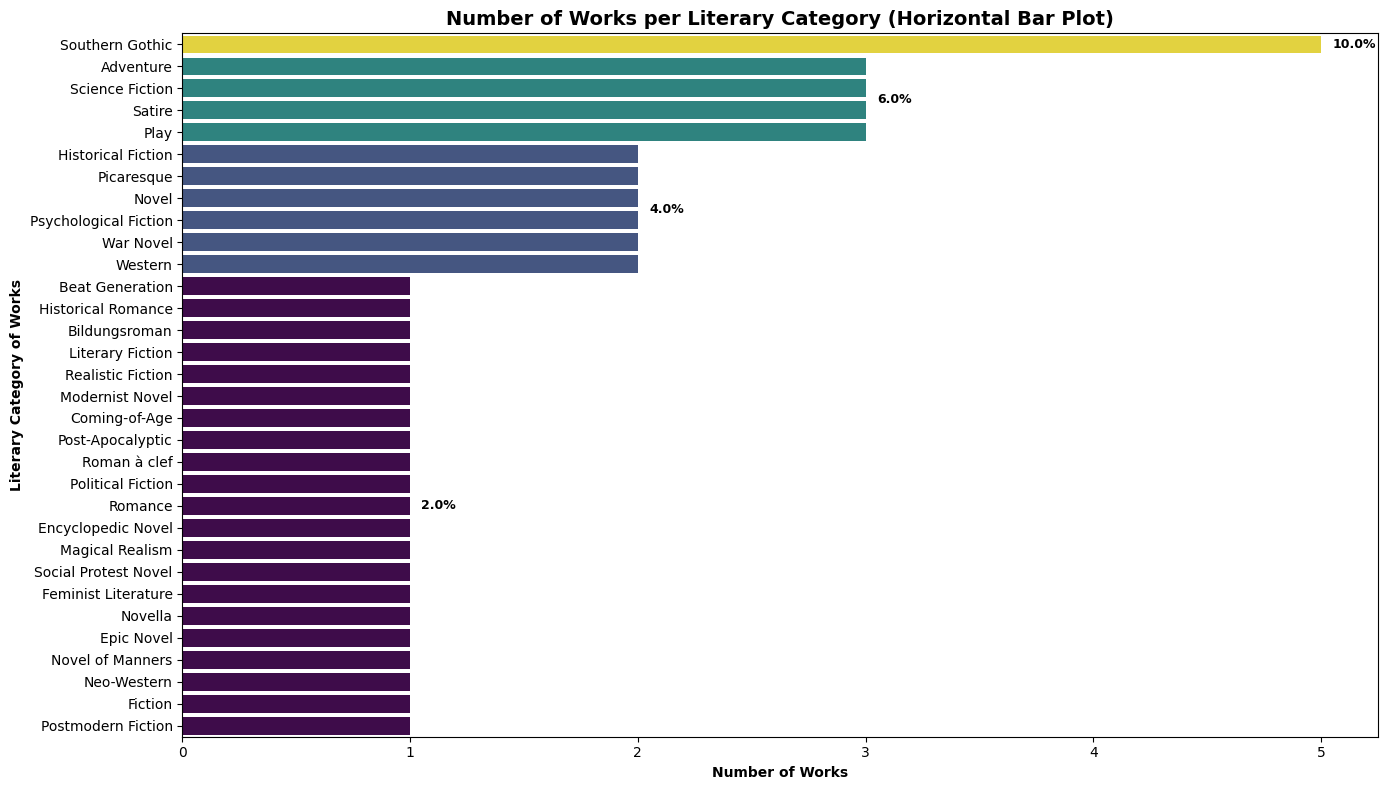

In [6]:
# Count works per category
works_per_category = df['category'].value_counts()

# Total number of works
total_works = len(df)

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    y=works_per_category.index,
    x=works_per_category.values,
    hue=works_per_category.values,
    legend=False,
    palette='viridis'
)

# Define title and axis labels
plt.title('Number of Works per Literary Category (Horizontal Bar Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Works', fontweight='bold')
plt.ylabel('Literary Category of Works', fontweight='bold')

# Add the percentages
values = works_per_category.values
for v in sorted(set(values)):
    idxs = [i for i, val in enumerate(values) if val == v]
    y_center = (idxs[0] + idxs[-1]) / 2
    percentage = (v / total_works) * 100

    ax.text(
        v + 0.05,
        y_center,
        f'{percentage:.1f}%',
        va='center',
        ha='left',
        fontsize=9,
        fontweight='bold'
    )


plt.tight_layout()
plt.show()

# Step 7: Research Question 1 (2/3)
## ***How many works belong to each category?***

Complementarily, a **Pareto chart** is used to display the *cumulative percentage* of works per literary `category`, highlighting concentration patterns beyond simple frequency counts.

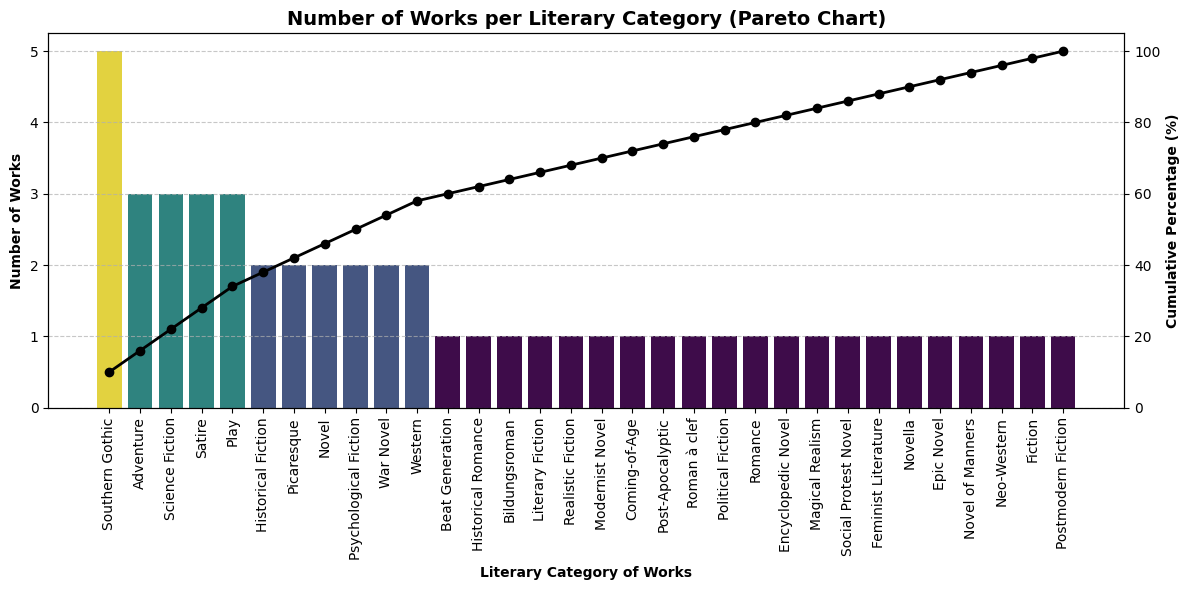

In [7]:
# Cumulative percentages
cum_counts = works_per_category.cumsum()
cum_percentage = cum_counts / total_works * 100

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=works_per_category.index,
    y=works_per_category.values,
    hue=works_per_category.values,
    legend=False,
    palette='viridis'
)

# Primary y-axis
ax.set_ylabel('Number of Works', fontweight='bold')

# x-axis
ax.set_xlabel('Literary Category of Works', fontweight='bold')
plt.xticks(rotation=90, ha='center')

# Second y-axis
ax2 = ax.twinx()
ax2.plot(
    works_per_category.index,
    cum_percentage.values,
    color='black',
    marker='o',
    linewidth=2
)

ax2.set_ylabel('Cumulative Percentage (%)', fontweight='bold')
ax2.set_ylim(0, 105)

# Define the title and axis labels
plt.title('Number of Works per Literary Category (Pareto Chart)', fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 8: Research Question 1 (3/3)
## ***How many works belong to each category?***

Finally, a **treemap** is employed as a supplementary visualisation to provide an intuitive overview of the *relative proportions* of works across literary `category`

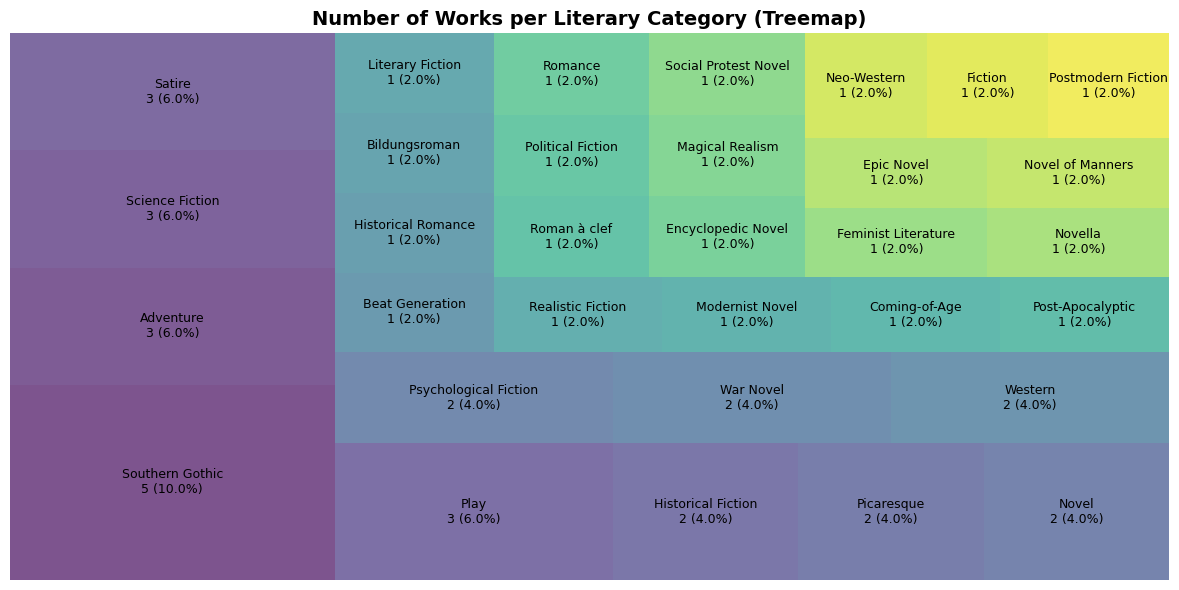

In [8]:
# Define the labels
labels = [
    f"{cat}\n{cnt} ({cnt/total_works*100:.1f}%)"
    for cat, cnt in zip(works_per_category.index, works_per_category.values)
]

sizes = works_per_category.values

colors = sns.color_palette("viridis", len(sizes))

# Create the treemap
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.7,
    pad=False,
    text_kwargs={'fontsize': 9}
)

# Define the title
plt.title("Number of Works per Literary Category (Treemap)", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

# Step 9: Research Question 2 (1/2)
## ***What is the range of publication date of the works?***

A **box plot** of `year` is employed to summarise and visualise *central tendency* and *potential outliers* based on the IQR method.

The *mean* value is additionally displayed to support interpretation.


Range: 156 years


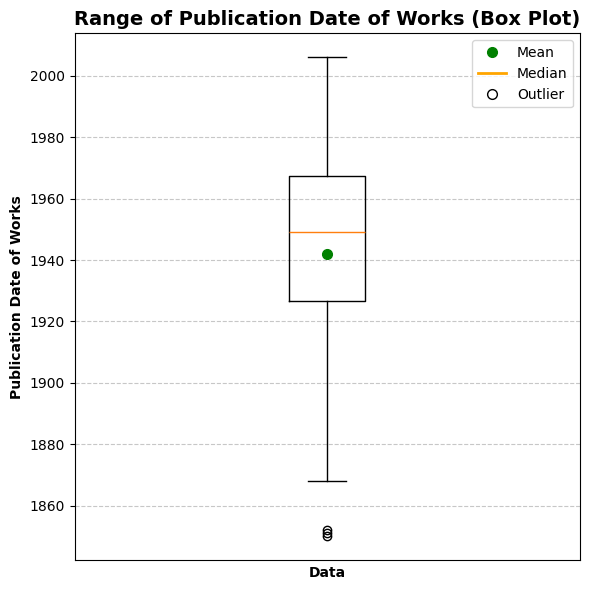

In [9]:
# Define the feature and plot title as variables
plot_feature = 'year'
x_axis_label = 'Data'
y_axis_label = 'Publication Date of Works'
plot_title = 'Range of Publication Date of Works (Box Plot)'

# Calculate and display the Range
y_min = df[plot_feature].min()
y_max = df[plot_feature].max()
year_range = y_max - y_min
print(f"Range: {year_range} years")

# Create the box plot for the specified feature
plt.figure(figsize=(6, 6))
plt.boxplot(df[plot_feature], showmeans=True, meanprops=dict(marker='o', markerfacecolor='green', markeredgecolor='green', markersize=7))

# Create a legend for the mean, median, and outliers
median_legend= Line2D(
    [0], [0],
    color='orange',
    lw=2,
    label= 'Median'
)
mean_legend= Line2D(
    [0], [0],
    marker= 'o',
    color='w',
    label= 'Mean',
    markerfacecolor='green',
    markeredgecolor='green',
    markersize=7
)
outlier_legend= Line2D(
    [0], [0],
    marker= 'o',
    color='w',
    label= 'Outlier',
    markerfacecolor='white',
    markeredgecolor='black',
    markersize=7
)
plt.legend(handles=[mean_legend, median_legend, outlier_legend], loc='upper right')

plt.xlabel(x_axis_label, fontweight='bold')
plt.ylabel(y_axis_label, fontweight='bold')
plt.xticks([])
plt.title(plot_title, fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 10: Research Question 2 (2/2)
## ***What is the range of publication date of the works?***

Complementarily, a **histogram** grouped by `decade` is additionally employed to provide a broader view of the *distribution's shape* and *skewness*.

A *KDE curve* is added to support distributional interpretation, together with the *mean* and *median* reference lines.


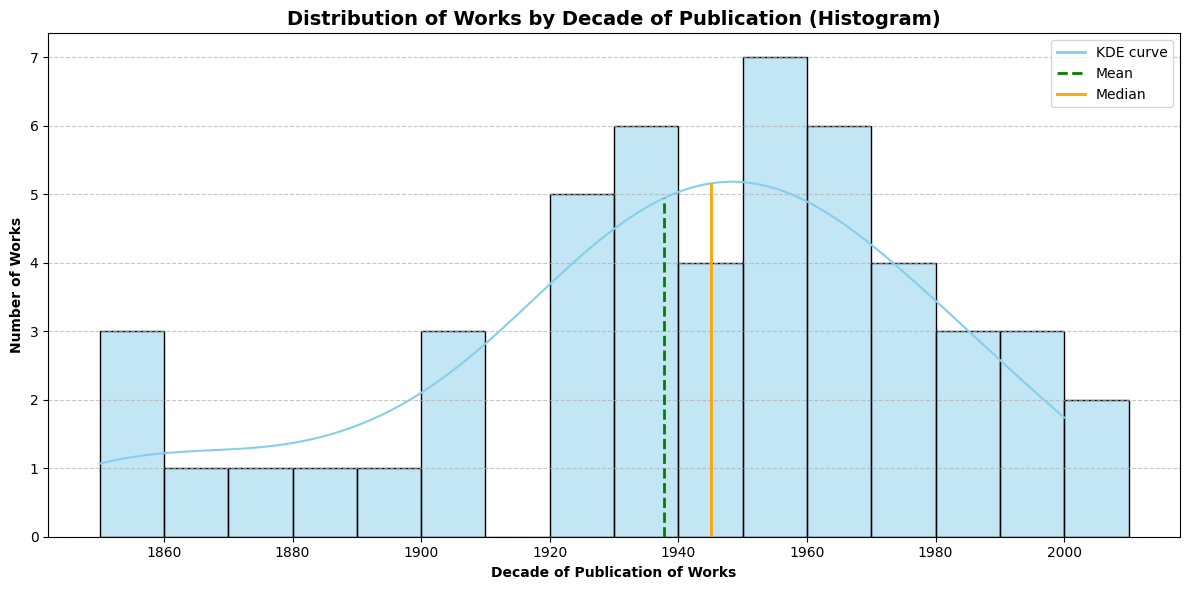

In [10]:
# Define decade as a variable
df['decade'] = (df['year'] // 10) * 10

# Calculate mean and median
mean_decade = df['decade'].mean()
median_decade = df['decade'].median()

# Define plot variables
x_axis_label = 'Decade of Publication of Works'
y_axis_label = 'Number of Works'
plot_title = 'Distribution of Works by Decade of Publication (Histogram)'

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    df['decade'],
    bins=range(df['decade'].min(), df['decade'].max() + 20, 10),
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Create the KDE curve
kde_lines = ax.lines
if len(kde_lines) == 0:
    raise RuntimeError("No KDE line found. Make sure kde=True in sns.histplot.")

kde_line = kde_lines[-1]
x_kde = kde_line.get_xdata()
y_kde = kde_line.get_ydata()

# Define height of KDE at mean/median
y_mean = np.interp(mean_decade, x_kde, y_kde)
y_median = np.interp(median_decade, x_kde, y_kde)

# Draw vertical lines that stop at the KDE intersection
ax.vlines(mean_decade, 0, y_mean, color='green', linestyle='--', linewidth=2)
ax.vlines(median_decade, 0, y_median, color='orange', linestyle='-', linewidth=2)

# Create a legend
legend_elements = [
    Line2D([0], [0], color='skyblue', lw=2, label='KDE curve'),
    Line2D([0], [0], color='green', lw=2, linestyle='--', label='Mean'),
    Line2D([0], [0], color='orange', lw=2, linestyle='-', label='Median'),
]
plt.legend(handles=legend_elements, loc='upper right')

plt.xlabel(x_axis_label, fontweight='bold')
plt.ylabel(y_axis_label, fontweight='bold')
plt.title(plot_title, fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 11: Research Question 3
## ***Can we predict the rating of a work based on its length?***

A **simple linear regression** model is employed to predict `average_rating` based on `pages`

The relationship is then displayed as a **scatter plot** with a fitted regression line.

*Vertical residuals* are added to provide a clearer indication of prediction erros.

Simple Linear Regression Model:

Coefficient (Slope): 0.00
Intercept: 3.89
R^2 (coefficient of determination): 0.032561674219838355


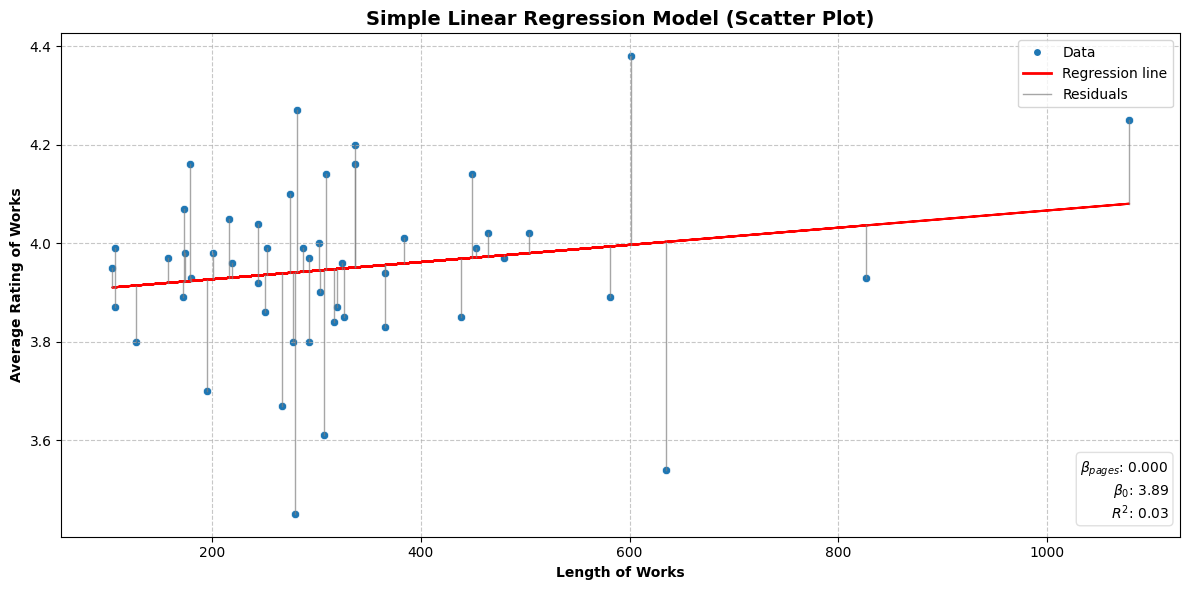

In [11]:
# Define the features for regression and the plot title
x_feature = 'pages'
y_feature ='average_rating'
plot_title = 'Simple Linear Regression Model'

# Prepare the data
X = df[[x_feature]].values
y = df[y_feature].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Get the coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_
r2_simple = model.score(X, y)

print(f"Simple Linear Regression Model:")
print(f"\nCoefficient (Slope): {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")
print("R^2 (coefficient of determination):", r2_simple)

# Plot the results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x_feature, y=y_feature, data=df, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Annotation text
annotation_text = (
    f"$\\beta_{{pages}}$: {coefficient:.3f}\n"
    f"$\\beta_0$: {intercept:.2f}\n"
    f"$R^2$: {r2_simple:.2f}"
)

# Place annotation inside the plot
plt.text(
    0.99, 0.03,
    annotation_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    horizontalalignment='right',
    verticalalignment='bottom',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='lightgray', alpha=0.7)
)

# Draw residual lines
for xi, yi, yhat in zip(X.flatten(), y, y_pred):
    plt.plot(
        [xi, xi],
        [yi, yhat],
        color='gray',
        alpha=0.7,
        linewidth=1
    )

# Create a legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label='Data',
           markerfacecolor='C0', markersize=6),

    Line2D([0], [0], color='red', lw=2,
           label='Regression line'),

    Line2D([0], [0], color='gray', lw=1,
           alpha=0.7,
           label='Residuals')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('Simple Linear Regression Model (Scatter Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Length of Works', fontweight='bold')
plt.ylabel('Average Rating of Works', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 12: Research Question 4 (1/3)
## ***Which are the 40 most frequently found lemmas in the descriptions of the works?***

Textual data of `descriptions` are preprocessed through *lowercasing*, *noise removal*, *tokenisation*, *stopword elimination*, and *lemmatisation*.

A **horizontal bar plot** is then employed to visualise lemma frequencies explicitly, allowing for precise comparison.

This visual aid is appropriate for *nominal data*. In addition, categories are sorted in *ascending order*, and relative *percentages* are added to enhance interpretability.


Text preprocessing completed. Displaying first few processed descriptions:
                    title                              processed_description
0        The Great Gatsby  novel chronicle era fitzgerald dubbed jazz age...
1   To Kill a Mockingbird  unforgettable novel childhood sleepy southern ...
2  The Catcher in the Rye  heronarrator catcher rye ancient child sixteen...
3               Moby-Dick  ignoring instruction write two paragraph mobyd...
4                 Beloved  staring unflinchingly abyss slavery spellbindi...


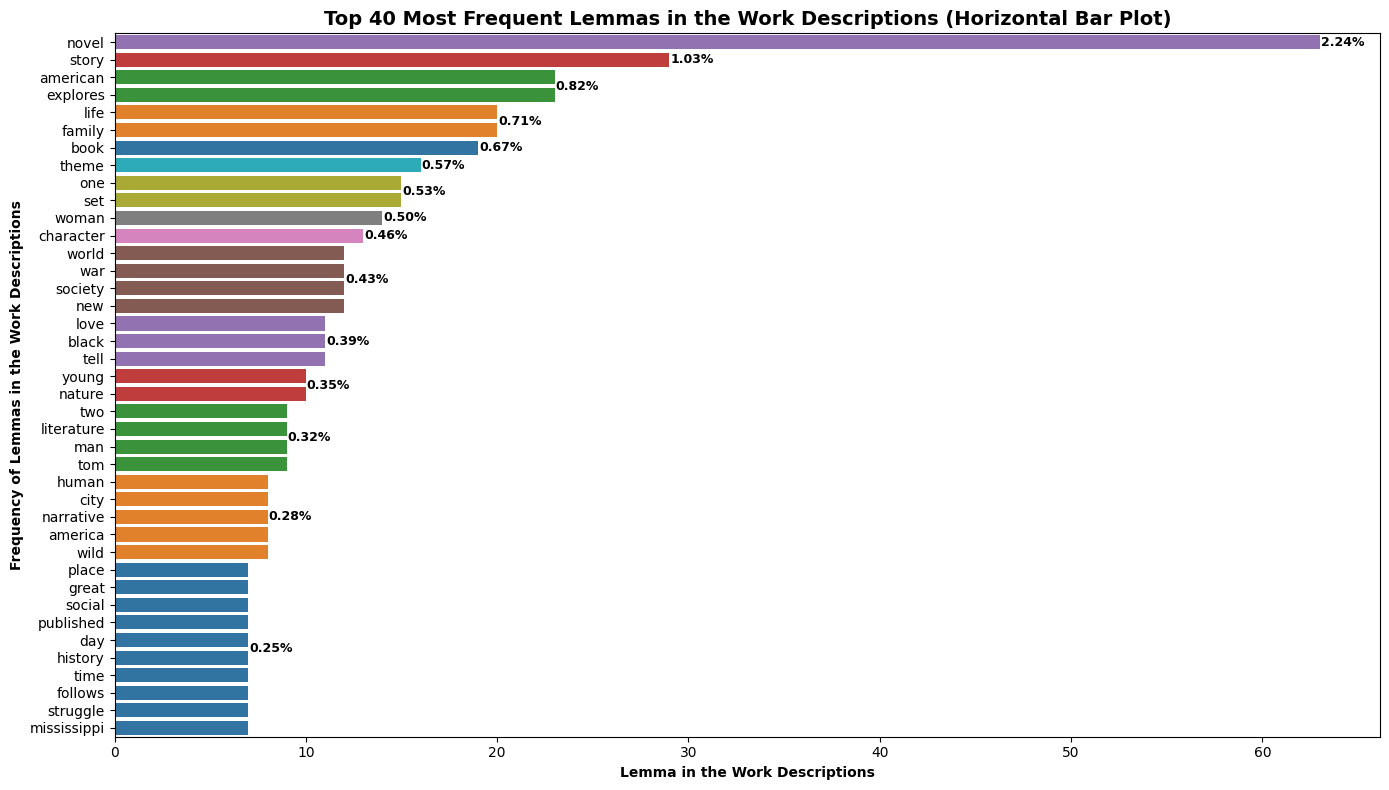

In [12]:
# Define the number of words included in the wordcloud and the source feature of the lemmas
num_of_words = 40
text_feature = 'description'

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(processed_tokens)

# Apply preprocessing to the 'description' column
df['processed_description'] = df[text_feature].apply(preprocess_text)

print("Text preprocessing completed. Displaying first few processed descriptions:")
print(df[['title', 'processed_description']].head())

# Combine all processed descriptions into a single string
all_words = ' '.join(df['processed_description'])

# Split all processed descriptions into tokens
all_tokens = " ".join(df['processed_description']).split()

# Count frequencies
word_freq = Counter(all_tokens)

# Get top 40 words
top_words = word_freq.most_common(num_of_words)

# Convert to DataFrame
words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])

# Total number of tokens (for percentages)
total_tokens = sum(word_freq.values())

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    y='word',
    x='frequency',
    hue='frequency',
    data=words_df,
    legend=False,
    palette='tab10'
    )

# Define title and axis labels
plt.title('Top 40 Most Frequent Lemmas in the Work Descriptions (Horizontal Bar Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Lemma in the Work Descriptions', fontweight='bold')
plt.ylabel('Frequency of Lemmas in the Work Descriptions', fontweight='bold')

# Add the percentages
values = words_df['frequency'].values
for v in sorted(set(values)):
    idxs = [i for i, val in enumerate(values) if val == v]
    y_center = (idxs[0] + idxs[-1]) / 2
    percentage = (v / total_tokens) * 100

    ax.text(
        v + 0.05,
        y_center,
        f'{percentage:.2f}%',
        va='center',
        ha='left',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Step 13: Research Question 4 (2/3)
## ***Which are the 40 most frequently found lemmas in the descriptions of the works?***

Complementarily, the **40 most frequent lemmas** are visualised using a **word cloud**, thereby providing an exploratory overview of dominant terms.


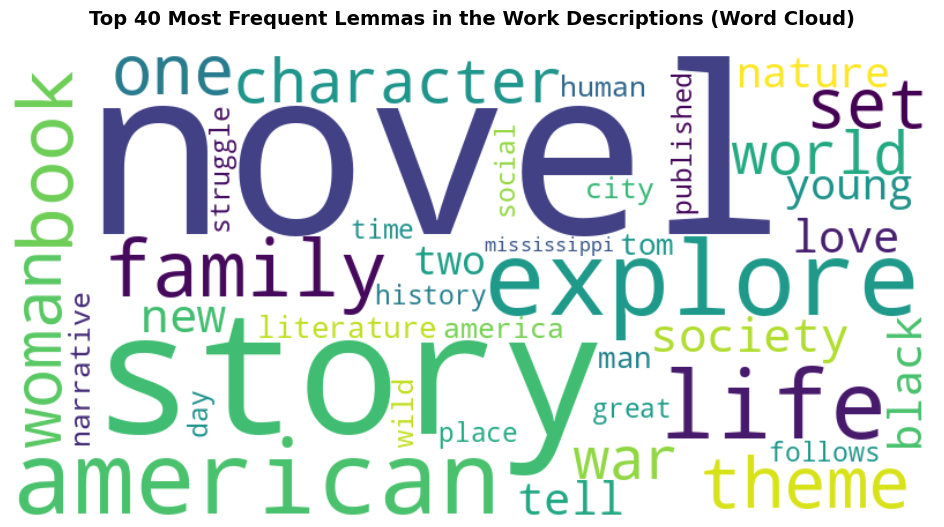

Word cloud generated and displayed successfully.


In [13]:
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=num_of_words, collocations=False).generate(all_words)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Most Frequent Lemmas in the Work Descriptions (Word Cloud)\n', fontsize=14, fontweight='bold')
plt.show()

print("Word cloud generated and displayed successfully.")

# Step 14: Research Question 4 (3/3)
## ***Which are the 40 most frequently found lemmas in the descriptions of the works?***

Finally, a **treemap** is employed as a supplementary visualisation to provide an intuitive overview of the *relative proportions* of salient terms.

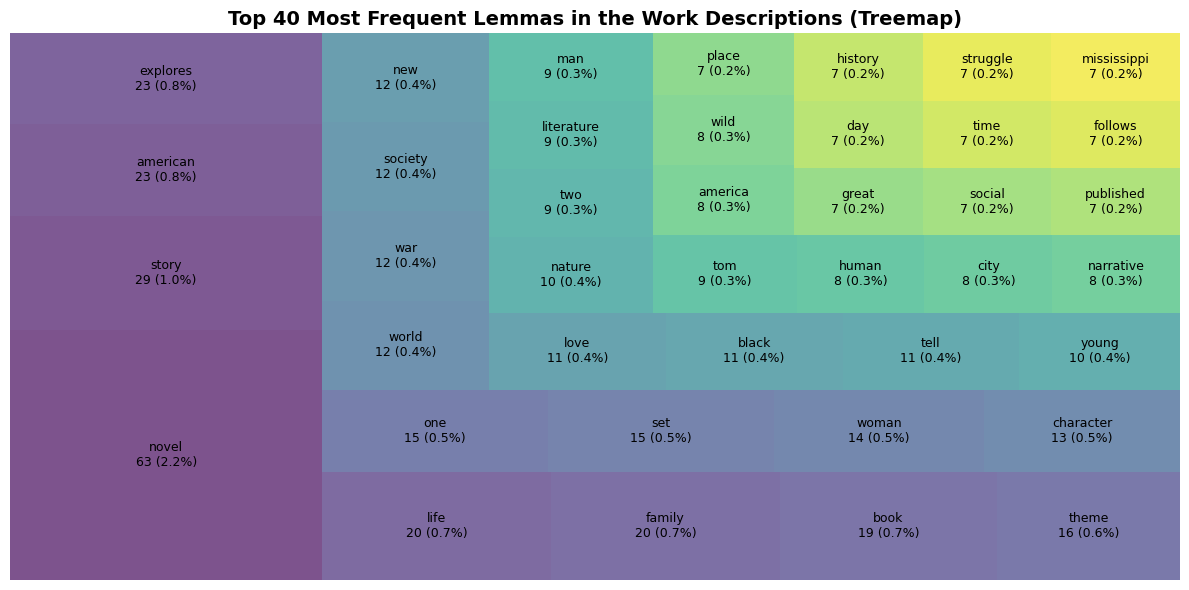

In [14]:
# Build a Series of the top 40 lemmas (index=word, values=frequency)
top_n = 40
word = words_df.set_index("word")["frequency"].sort_values(ascending=False).head(top_n)

# Define the labels (top 40)
labels = [
    f"{w}\n{cnt} ({cnt/total_tokens*100:.1f}%)"
    for w, cnt in zip(word.index, word.values)
]

sizes = word.values
colors = sns.color_palette("viridis", len(sizes))

# Create the treemap
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.7,
    pad=False,
    text_kwargs={'fontsize': 9}
)

plt.title("Top 40 Most Frequent Lemmas in the Work Descriptions (Treemap)", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

# Step 15: Research Question 5 (1/2)
##***Can we predict the rating of a work based on its length and publication date?***

A **multiple linear regression** model is employed to predict `average_rating` based on `pages` and `year`

To assess predictive performance, a **scatter plot** comparing `observed_average_rating` and `predicted_average_rating` is produced, allowing for an intuitive evaluation of model accuracy relative to the *perfect prediction line*.

*Vertical residuals* are added to provide a clearer indication of prediction erros.

In [15]:
# Multiple linear regression
# Predict average_rating from several variables
features = [
    "pages",
    "year"
]

target = "average_rating"

df_m = df[features + [target]].dropna()
X = df_m[features].values
y = df_m[target].values

linreg_multi = LinearRegression()
linreg_multi.fit(X, y)

# Display the results
print(f"Multiple Linear Regression Model:")
print("\nCoefficients:")
for fname, coef in zip(features, linreg_multi.coef_):
    print(f"{fname:20s}: {coef:.4f}")
print("\nIntercept:", linreg_multi.intercept_)


r2_multi = linreg_multi.score(X, y)
print("R^2 (multiple regression):", r2_multi)

Multiple Linear Regression Model:

Coefficients:
pages               : 0.0001
year                : 0.0022

Intercept: -0.4307852578599096
R^2 (multiple regression): 0.2816898168900076


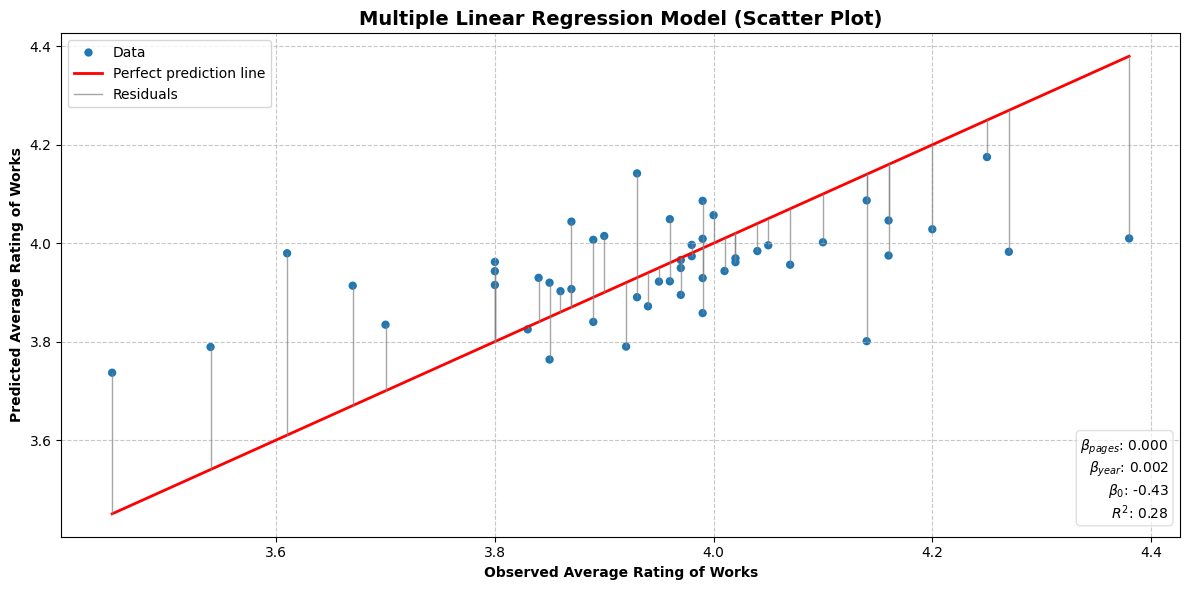

In [16]:
# Model
y_pred = linreg_multi.predict(X)
b_pages, b_year = linreg_multi.coef_
intercept = linreg_multi.intercept_

# Create the plot
plt.style.use("default")
plt.figure(figsize=(12, 6))

# Scatter: Observed vs Predicted
sns.scatterplot(
    x=y,
    y=y_pred,
    label="Data",
    edgecolor= 'none'
    )

# Perfect prediction line (y = x)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color="red",
    lw=2,
    label="Perfect prediction"
)

# Annotation text
annotation_text = (
    f"$\\beta_{{pages}}$: {b_pages:.3f}\n"
    f"$\\beta_{{year}}$: {b_year:.3f}\n"
    f"$\\beta_0$: {intercept:.2f}\n"
    f"$R^2$: {r2_multi:.2f}"
)

# Place annotation
plt.text(
    0.99, 0.03,
    annotation_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    horizontalalignment="right",
    verticalalignment="bottom",
    bbox=dict(
        boxstyle="round",
        facecolor="white",
        edgecolor="lightgray",
        alpha=0.7
    )
)

# Draw residual lines
for obs, pred in zip(y, y_pred):
    plt.plot(
        [obs, obs],
        [obs, pred],
        color="gray",
        alpha=0.7,
        linewidth=1
    )

# Custom legend
legend_elements = [
    Line2D(
        [0], [0],
        marker="o",
        color="w",
        label="Data",
        markerfacecolor="C0",
        markeredgecolor="none",
        markersize=6
    ),
    Line2D(
        [0], [0],
        color="red",
        lw=2,
        label="Perfect prediction line"
    ),
    Line2D(
        [0], [0],
        color="gray",
        lw=1,
        alpha=0.7,
        label="Residuals"
    )
]

plt.legend(handles=legend_elements, loc="upper left")

# Define titles and labels
plt.title("Multiple Linear Regression Model (Scatter Plot)", fontsize=14, fontweight="bold")
plt.xlabel("Observed Average Rating of Works", fontweight="bold")
plt.ylabel("Predicted Average Rating of Works", fontweight="bold")

# Grid
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


# Step 16: Research Question 5 (2/2)
##***Can we predict the rating of a work based on its length and publication date?***

Additionally, **unstandardised coefficients** are visualised to interpret the effects of each `predictor` in their original units, while **standardised coefficients** are subsequently employed to compare their relative importance on a common scale.

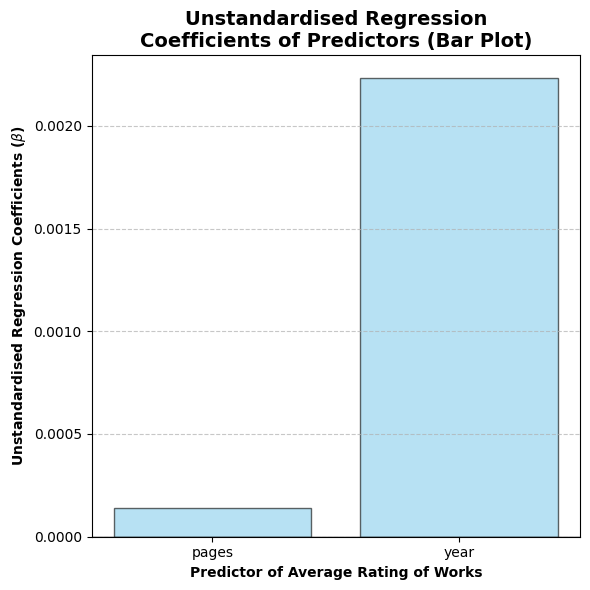

In [17]:
# Unstandardised coefficients from the multiple linear regression model
unstd_coefs = pd.Series(linreg_multi.coef_, index=features)

plt.figure(figsize=(6, 6))
plt.bar(
    unstd_coefs.index,
    unstd_coefs.values,
    color='skyblue',
    edgecolor='black',
    alpha=0.6
)

# Reference line at 0
plt.axhline(0, color="black", linewidth=1)

# Define title and axis labels
plt.title(
    "Unstandardised Regression\nCoefficients of Predictors (Bar Plot)",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel(
    "Predictor of Average Rating of Works",
    fontweight="bold"
)
plt.ylabel(
    "Unstandardised Regression Coefficients ($\\beta$)",
    fontweight="bold"
)

# Grid and layout
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


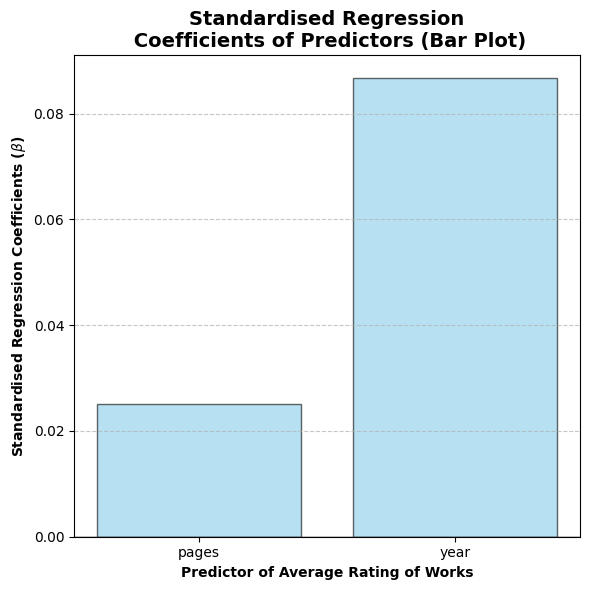

In [18]:
# Standardised coefficients from the multiple linear regression model
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X, y)

std_model = pipe.named_steps["linearregression"]
std_coefs = pd.Series(std_model.coef_, index=features)

plt.figure(figsize=(6, 6))
plt.bar(std_coefs.index, std_coefs.values, color='skyblue', edgecolor='black', alpha=0.6)
plt.axhline(0, color="black", linewidth=1)

# Define titles and axis labels
plt.title("Standardised Regression\n Coefficients of Predictors (Bar Plot)", fontsize=14, fontweight="bold")
plt.xlabel("Predictor of Average Rating of Works", fontweight="bold")
plt.ylabel("Standardised Regression Coefficients ($\\beta$)", fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Step 17: Research Question 6 (1/3)
## ***How do the ratings of the works vary across literary periods?***

First, a **box plot** is employed to summarise and visualise the *central tendency* and *potential outliers* of `average_rating` across `literary_period`, using the IQR method.

The *mean* value is additionally displayed to support interpretation.

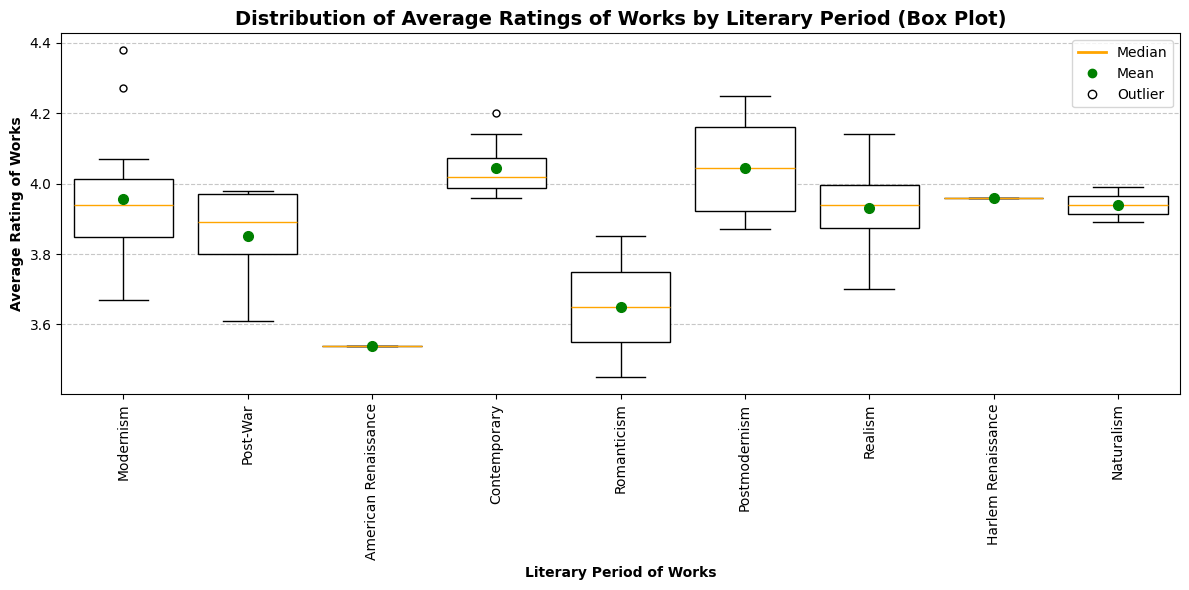

In [19]:
# Create the box plot
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='literary_period',
    y='average_rating',
    data=df,
    color='white',
    showmeans=True,
    meanprops={'marker': 'o','markerfacecolor': 'green','markeredgecolor': 'green','markersize': 7},
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='orange'),
    flierprops=dict(
        marker='o',
        markerfacecolor='white',
        markeredgecolor='black',
        markersize=5
        )
    )
# Define the titles and axis labels
plt.xlabel('Literary Period of Works', fontweight='bold')
plt.ylabel('Average Rating of Works', fontweight='bold')
plt.title(
    'Distribution of Average Ratings of Works by Literary Period (Box Plot)',
    fontsize=14,
    fontweight='bold'
)

# Legend handles
median_legend = Line2D(
    [0], [0],
    color='orange',
    lw=2,
    label='Median'
)

mean_legend = Line2D(
    [0], [0],
    marker='o',
    color='w',
    label='Mean',
    markerfacecolor='green',
    markeredgecolor='green',
    markersize=6
)

outlier_legend = Line2D(
    [0], [0],
    marker='o',
    color='w',
    label='Outlier',
    markerfacecolor='white',
    markeredgecolor='black',
    markersize=6
)

plt.legend(
    handles=[median_legend, mean_legend, outlier_legend],
    loc='upper right'
)

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 18: Research Question 6 (2/3)
## ***How do the ratings of the works vary across literary periods?***

Complementarily, a **swarm plot** is used to visualise individual observations and reveal sample size imbalances and potential underrepresentation across `literary_period`

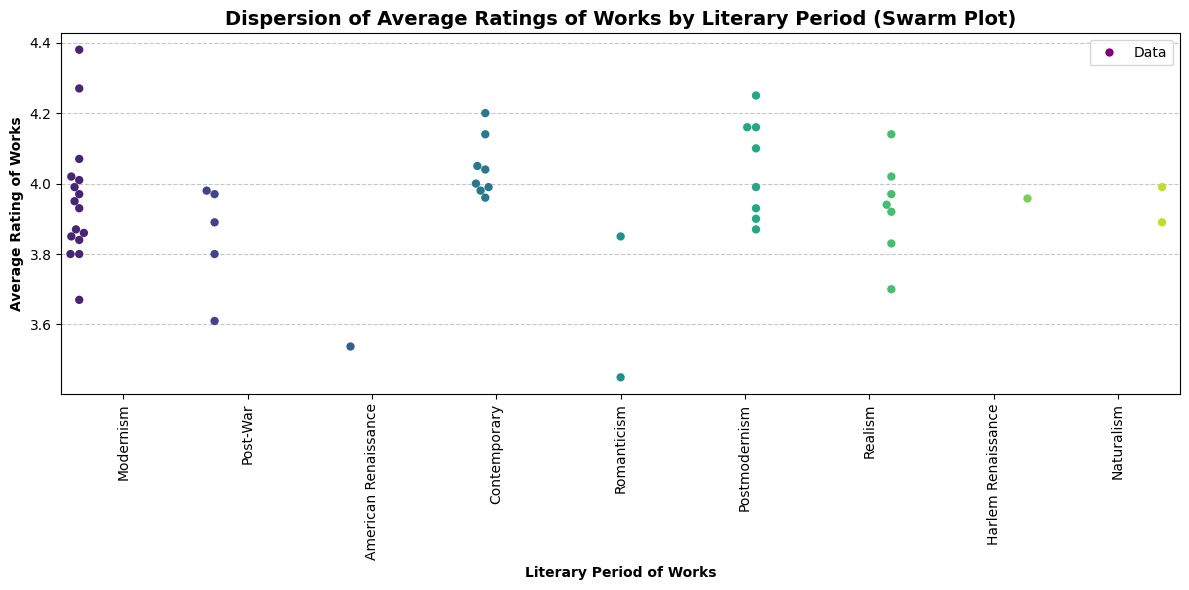

In [20]:
# Create the swarm plot
plt.figure(figsize=(12, 6))

sns.swarmplot(
    x='literary_period',
    y='average_rating',
    data=df,
    palette='viridis',
    hue='literary_period',
    dodge=True,
    size=6
)

plt.xlabel('Literary Period of Works', fontweight='bold')
plt.ylabel('Average Rating of Works', fontweight='bold')
plt.title(
    'Dispersion of Average Ratings of Works by Literary Period (Swarm Plot)',
    fontsize=14,
    fontweight='bold'
)
# Create a legend for the data
data_legend= Line2D(
    [0], [0],
    marker='o',
    color='w',
    label='Data',
    markerfacecolor='purple',
    markersize=7
)
plt.legend(handles=[data_legend], loc='upper right')

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 19: Research Question 6 (3/3)
## ***How do the ratings of the works vary across literary periods?***

Finally, a **violin plot** is presented as an exploratory visualisation to provide an intuitive view of the distributional shape of `average_rating` across `literary_period`

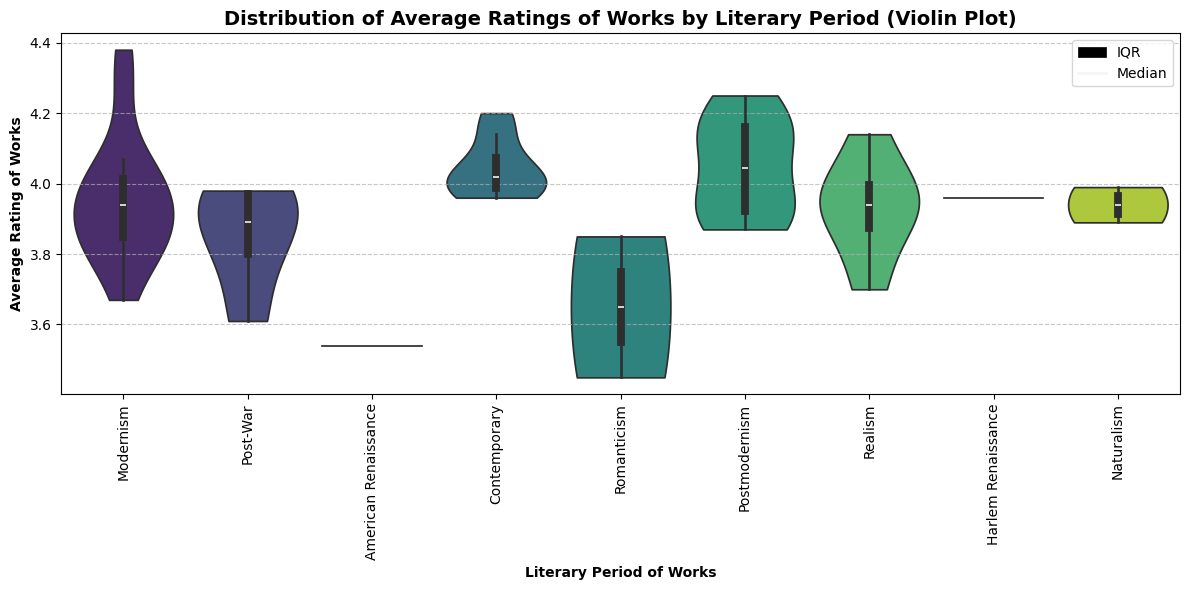

In [21]:
# Create the violin plot
plt.figure(figsize=(12, 6))

sns.violinplot(
    x='literary_period',
    y='average_rating',
    data=df,
    inner='box',
    palette='viridis',
    hue='literary_period',
    split=False,
    cut=0
)

plt.xlabel('Literary Period of Works', fontweight='bold')
plt.ylabel('Average Rating of Works', fontweight='bold')
plt.title(
    'Distribution of Average Ratings of Works by Literary Period (Violin Plot)',
    fontsize=14,
    fontweight='bold'
)

# Legend handle for IQR
iqr_legend= Patch(
    facecolor='black',
    edgecolor='black',
    linewidth=0.5,
    label= 'IQR'
)
# Legend handle for Median
median_violin_legend = Line2D(
    [0], [0],
    color='whitesmoke',
    lw=2,
    label='Median'
)
plt.legend(handles=[iqr_legend, median_violin_legend], loc='upper right')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()